In [ ]:
#pip install pytesseract

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
from skimage.transform import rotate
#import pytesseract
#from google.colab.patches import cv2_imshow

In [ ]:
def img_hough(img) -> int:
  first_threshold, min_threshold = 250,999
  linhas=None
  while(linhas is None and first_threshold>0):
    first_threshold-=25
    try:
      linhas = cv2.HoughLines(img,rho=1,theta=np.pi/180,threshold=first_threshold)
      if (len(linhas)<10):
        min_threshold = first_threshold
        linhas = None
    except:
      pass
  if(linhas is None and min_threshold<999):
    linhas = cv2.HoughLines(img,rho=1,theta=np.pi/180,threshold=min_threshold)

  # draw lines
  soma=np.zeros(180)
  for i in range(0, len(linhas)):
    for rho, theta in linhas[i]:
      if(theta<0):              #nao é para entrar aqui
        theta*=-1
      while(theta>2*np.pi):
        theta-=2*np.pi
      #if(int(theta*57.2958)==104 or int(theta*57.2958)==86):
      '''if(theta==theta):
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1,y1), (x2,y2), color=(255), thickness=1)'''
      
      soma[int(theta*57.2958)]+=1
  print(f'O melhor angulo é: {np.where(soma==np.amax(soma))[0][0]}')
    
  #print(soma.shape)
  #print(soma)

  plt.axis('off')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()
  return np.where(soma==np.amax(soma))[0][0]

In [ ]:
def img_proj_horizontal(img) -> int:
  pixels_pretos_hor = np.zeros(img.shape[0])
  pixels_pretos_ver = np.zeros(img.shape[1])

  pixels_pretos_hor = np.sum(img,axis=1)
  pixels_pretos_ver = np.sum(img,axis=0)

  max = [np.max(pixels_pretos_hor),np.max(pixels_pretos_ver)]
  max_angle = 0

  #plt.plot(pixels_pretos_ver)
  for i in range(1,180):
    img_aux = rotaciona(img,i)

    pixels_pretos_hor = np.sum(img_aux,axis=1)
    pixels_pretos_ver = np.sum(img_aux,axis=0)
    max_aux = [np.max(pixels_pretos_hor),np.max(pixels_pretos_ver)]
    if((max_aux[0]>max[0]) or (max_aux[0]==max[0] and max_aux[1]>max[1])):
      #plt.plot(pixels_pretos_ver)
      max_angle = i
      max = [max_aux[0], max_aux[1]]
  print(f'O angulo encontrado foi: {max_angle}')

  #plt.imshow(img,cmap='gray')
  return max_angle


In [ ]:
def rotaciona(img, ang, binario=True) -> np.ndarray:
  img_aux = []
  if(binario):
    img_aux = rotate(img,ang)
    img_aux[img_aux>0]=1
  else:
    img_aux = rotate(img,ang,mode='wrap')
  return img_aux

def inverte(img) -> np.ndarray: #não usado
  img[img==255]=1
  img[img==0]=255
  img[img==1]=0
  return img
  

O melhor angulo é: 104


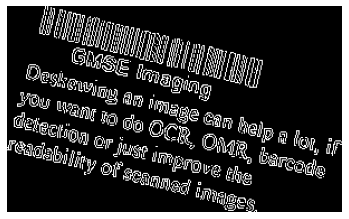

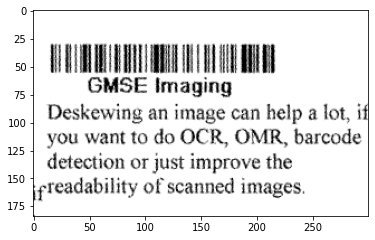

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.91441396, 0.95244713, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.22928469, 0.62265149, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
def align_hough(img_path):
  #ler dados
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

  #filtrar imagem
  img = cv2.Canny(img, threshold1=100, threshold2=200, apertureSize=3)

  #aplica a funcao
  angle = img_hough(img)

  #rotaciona na imagem original
  img = rotaciona(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE),angle-90,False)

  #printar/salvar
  plt.imshow(img,cmap='gray')
  plt.show()
  return img
#align_hough("sample1.png")

O angulo encontrado foi: 24


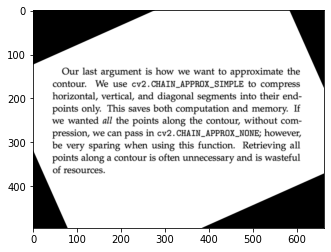

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def align_proj_horizontal(img_path):
  #ler dados
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

  #tornando a imagem binária
  img = cv2.Canny(img, threshold1=100, threshold2=200, apertureSize=3)
  #img[img<=200]=0
  img[img>200]=1  

  #aplicar funcao
  angle = img_proj_horizontal(img)

  #rotacionar
  img = rotaciona(cv2.imread(img_path, cv2.IMREAD_GRAYSCALE),angle,False)

  #printar/salvar
  plt.imshow(img,cmap='gray')
  plt.show()
  return img
#align_proj_horizontal("pos_24.png")

O melhor angulo é: 104


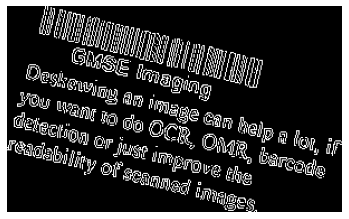

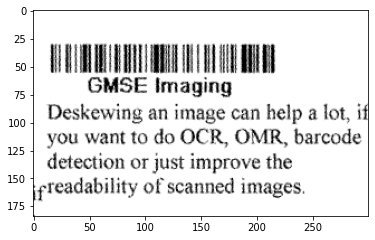

In [ ]:
def main(img_path):
  img_result = align_hough(img_path)
  cv2.imwrite("aloha.png",img_result)
  #print(pytesseract.image_to_string())

#colocar o path de uma imagem .png de um texto não alinhado no lugar de "sample.png"
main("sample1.png")